# カーネルリッジ回帰

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import ExpSineSquared
%matplotlib inline

rng = np.random.RandomState(1)

## サンプルデータ生成

In [12]:
X = 2*np.pi*rng.rand(30, 1)
Y = np.sin(X) + 0.2*rng.randn(30, 1)

## 5-fold クロスバリデーションによるパラメータ決定

In [13]:
grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
        "kernel": [ExpSineSquared(l, p)
                    for l in np.logspace(-2, 2, 10)
                    for p in np.logspace(0, 2, 10)]}
kreg = GridSearchCV(KernelRidge(), param_grid = grid, cv=5)
kreg.fit(X, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 0.1, 0.01, 0.001], 'kernel': [ExpSineSquared(length_scale=0.01, periodicity=1), ExpSineSquared(length_scale=0.01, periodicity=1.67), ExpSineSquared(length_scale=0.01, periodicity=2.78), ExpSineSquared(length_scale=0.01, periodicity=4.64), ExpSineSquared(length_scale=0.01, ...SineSquared(length_scale=100, periodicity=59.9), ExpSineSquared(length_scale=100, periodicity=100)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

## 予測と結果のプロット

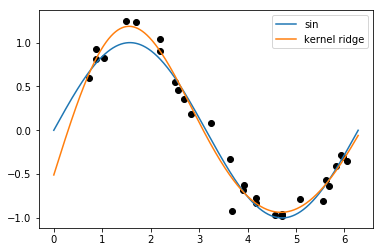

In [14]:
X_ = np.linspace(0, 2*np.pi, 1000)[:, None]
Y_ = kreg.predict(X_)

plt.scatter(X, Y, c='k')
plt.plot(X_, np.sin(X_), label='sin')
plt.plot(X_, Y_, label='kernel ridge')
plt.legend(loc='best')